<a href="https://colab.research.google.com/github/charann90/House-price-prediction/blob/main/part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House Price Prediction**

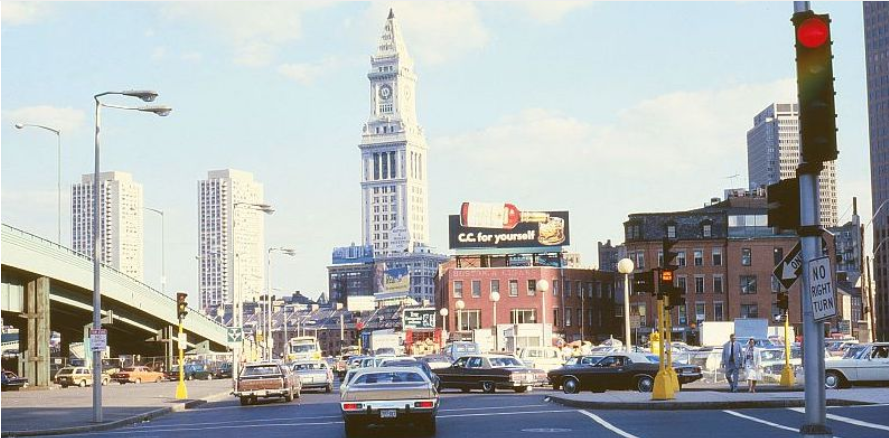

# Problem Statement


**Developing a Regression Model for Predicting House Prices Based on Various Features**

The objective of this project is to build a regression model that accurately predicts house prices based on a set of input features. The dataset consists of historical records of house transactions, with each record containing information such as the transaction date, house age, distance from the nearest metro station (in kilometers), the number of convenience stores in the vicinity, latitude, longitude, number of bedrooms, house size in square feet, and the house price per unit area.

The problem at hand is to develop a reliable regression model that can effectively estimate the price of a house given its features. By accurately predicting house prices, this model can be valuable for real estate agents, buyers, and sellers to make informed decisions regarding property valuation.

# Libraries

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [1]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#data uploading
df=pd.read_excel('/content/DS - Assignment Part 1 data set.xlsx')

In [4]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


# Preliminary Data Exploration 🔎

* What is the shape of `data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df.shape

(414, 9)

In [6]:
df.columns  # column names

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [7]:
df.count() # number of rows

Transaction date                            414
House Age                                   414
Distance from nearest Metro station (km)    414
Number of convenience stores                414
latitude                                    414
longitude                                   414
Number of bedrooms                          414
House size (sqft)                           414
House price of unit area                    414
dtype: int64

# Data Cleaning - Check for Missing Values and Duplicates

In [ ]:
df.info

<bound method DataFrame.info of      House Age  Distance from nearest Metro station (km)  \
0         32.0                                  84.87882   
1         19.5                                 306.59470   
2         13.3                                 561.98450   
3         13.3                                 561.98450   
4          5.0                                 390.56840   
..         ...                                       ...   
409       13.7                                4082.01500   
410        5.6                                  90.45606   
411       18.8                                 390.96960   
412        8.1                                 104.81010   
413        6.5                                  90.45606   

     Number of convenience stores  latitude  longitude  Number of bedrooms  \
0                              10  24.98298  121.54024                   1   
1                               9  24.98034  121.53951                   2   
2            

In [8]:
print(f'Any NaN values? {df.isna().values.any()}')

Any NaN values? False


In [9]:
print(f'Any duplicates? {df.duplicated().values.any()}')

Any duplicates? False


In [11]:
#dropping date column as we have house age 
df.drop(['Transaction date'],axis=1,inplace=True)

# Descriptive Statistics

In [10]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [ ]:
df.isnull().sum()

House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

# Visualise the Features

# House Prices 💰

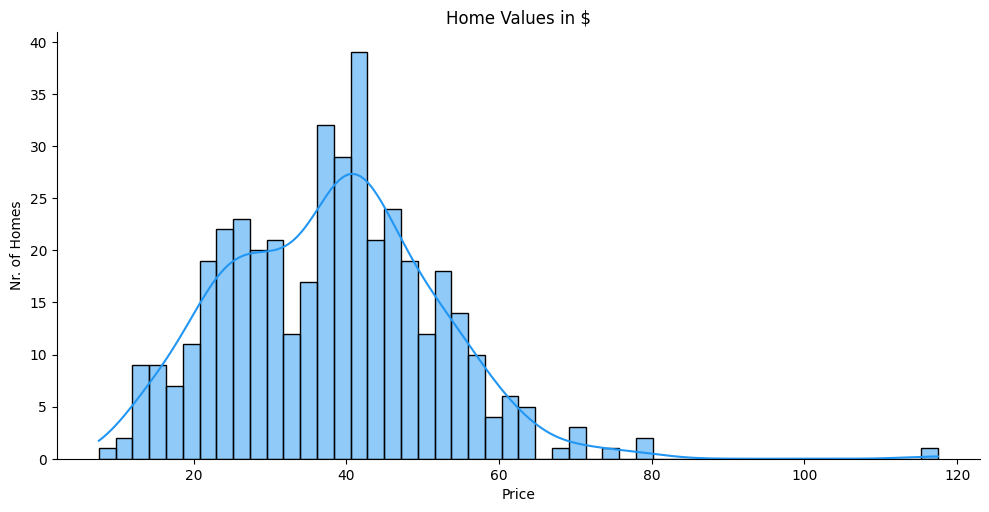

In [34]:
sns.displot(df['House price of unit area'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title('Home Values in $')
plt.xlabel('Price')
plt.ylabel('Nr. of Homes')

plt.show()


*   Price range distribution is slightly left skewed.




**Normalizing using log transformation**

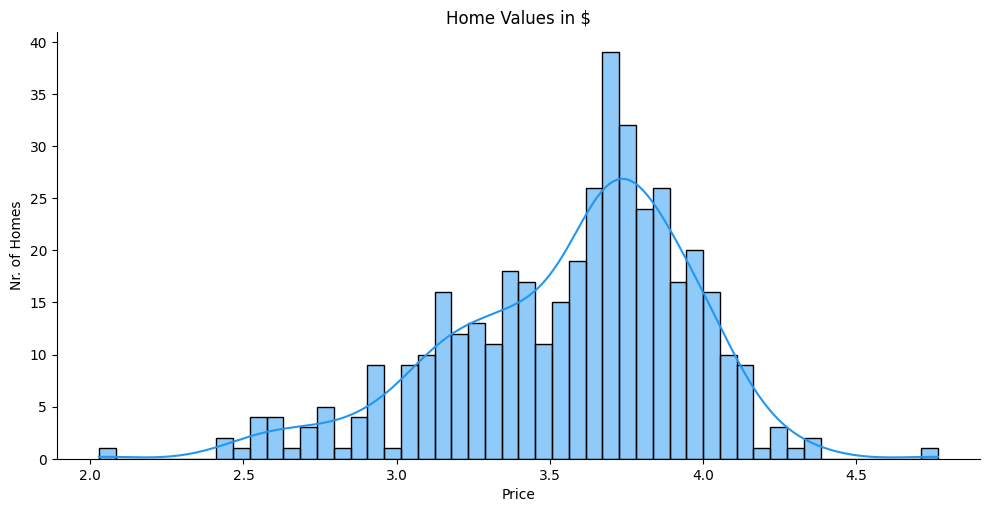

In [35]:
#Normalizing using log transformation
df['House price of unit area']=np.log(df['House price of unit area'])
sns.displot(df['House price of unit area'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title('Home Values in $')
plt.xlabel('Price')
plt.ylabel('Nr. of Homes')

plt.show()


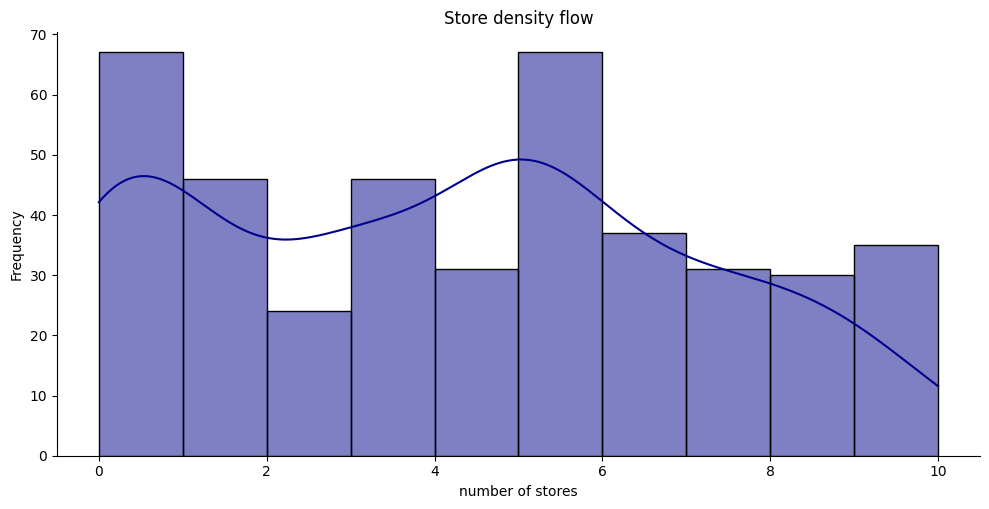

In [24]:
sns.displot(df['Number of convenience stores'],           
            aspect=2,
            kde=True, 
            color='darkblue')

plt.title('Store density flow')
plt.xlabel('number of stores')
plt.ylabel('Frequency')

plt.show()

**Number of bedrooms**

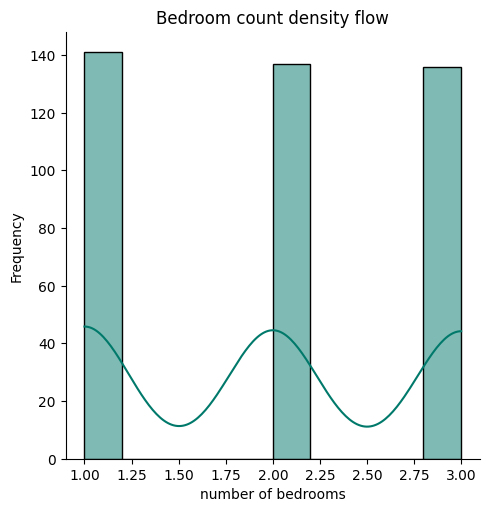

In [29]:
sns.displot(df['Number of bedrooms'],           
            kde=True, 
            color='#00796b')

plt.title('Bedroom count density flow')
plt.xlabel('number of bedrooms')
plt.ylabel('Frequency')

plt.show()

# Access to Metro Station 🛣

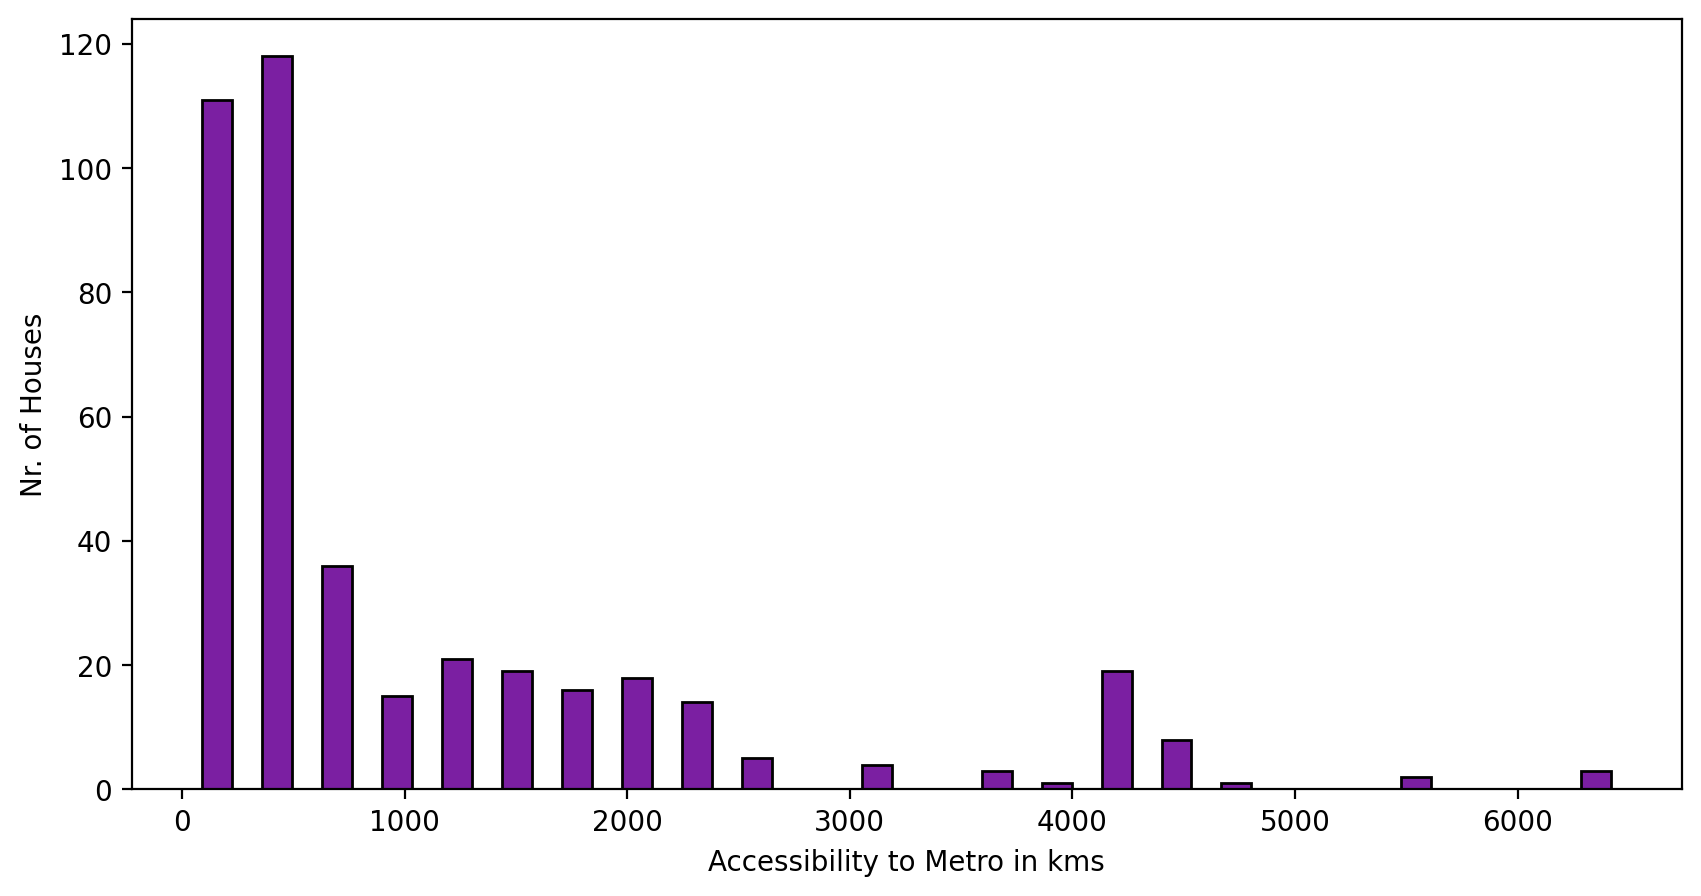

In [31]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(df['Distance from nearest Metro station (km)'], 
         bins=24, 
         ec='black', 
         color='#7b1fa2', 
         rwidth=0.5)

plt.xlabel('Accessibility to Metro in kms')
plt.ylabel('Nr. of Houses')
plt.show()

# Understand the Relationships in the Data

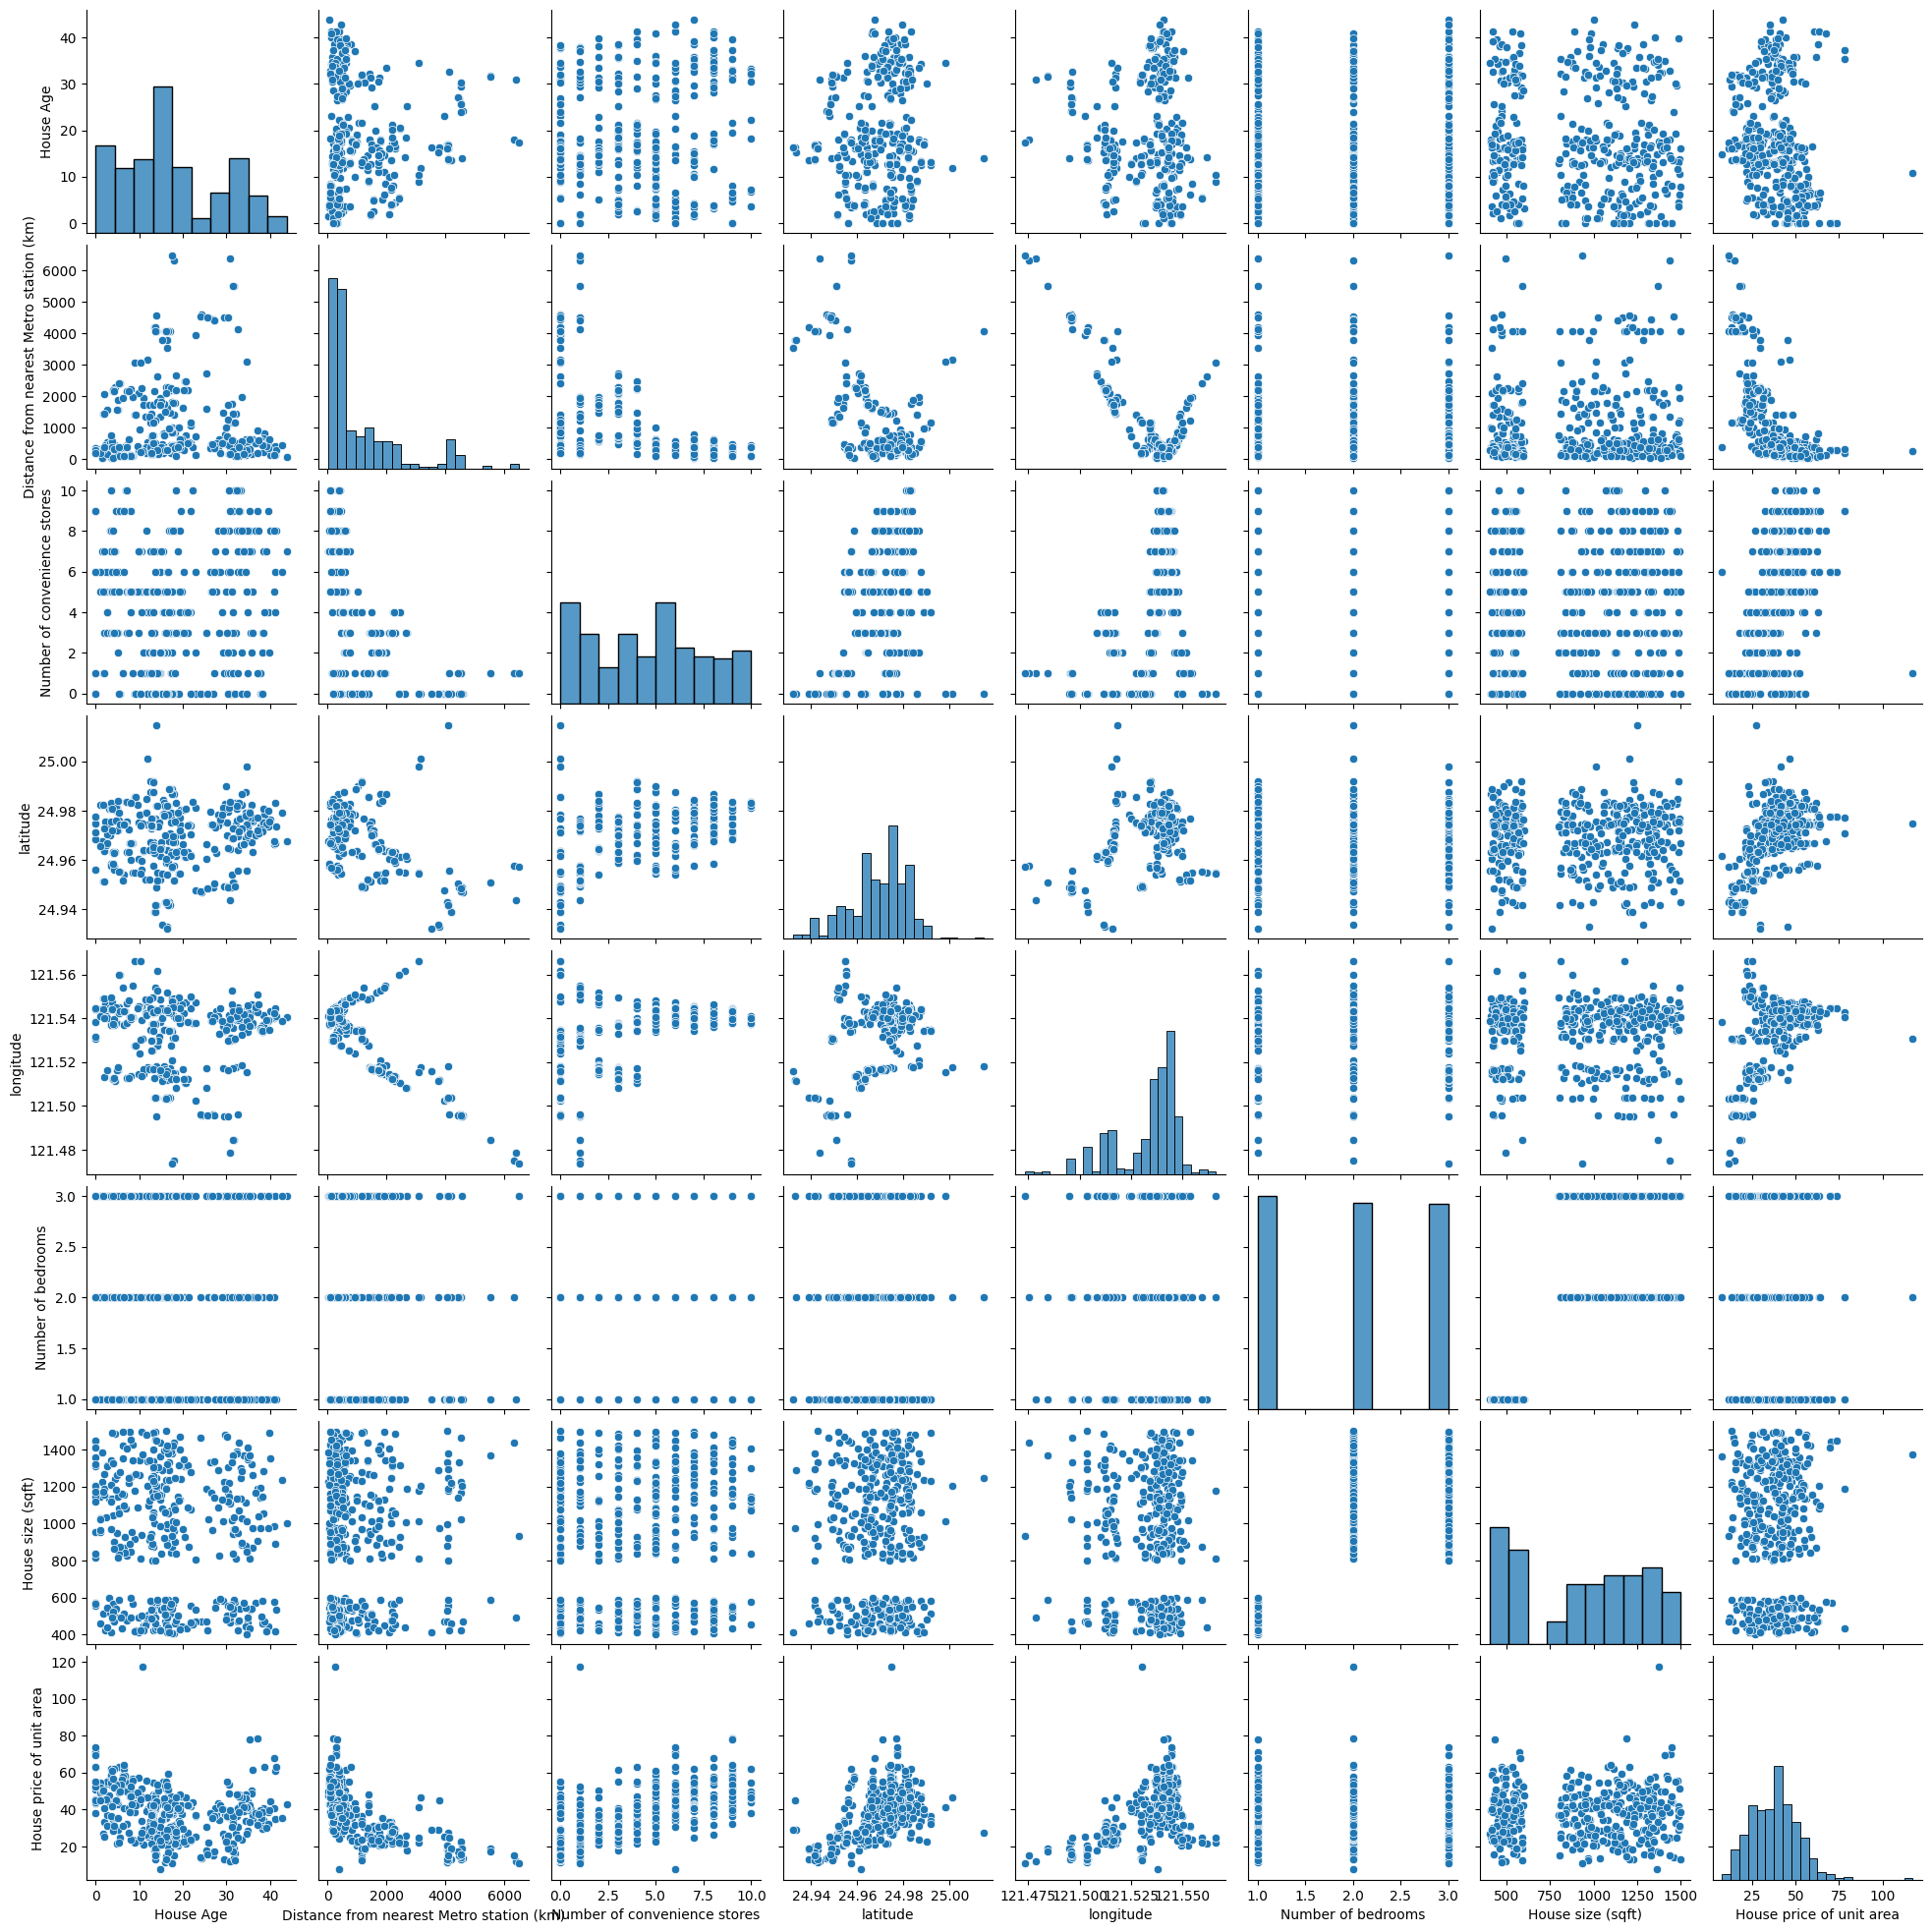

In [32]:
sns.pairplot(df)

plt.show()

We see that we get back a grid. You might have to zoom in or squint a bit, but there are scatterplots between all the columns in our dataset. And down the diagonal in the middle, we get histograms for all our columns.

In [36]:
df

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


# Machine Learning

# Split Training & Test Dataset

In [37]:
#splitting the data into x and y variables 
y=df['House price of unit area']
x=df.drop(['House price of unit area'],axis=1)

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=42)

# Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression


In [40]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [41]:
regressor.intercept_

-2512.252468955647

In [ ]:
regressor.coef_

array([-2.70871206e-01, -4.93344204e-03,  2.91363334e+02, -1.08873256e+02,
        2.80280809e-03, -2.83682631e+00, -1.05425651e+00, -6.96488332e+00,
       -6.66973634e+00, -5.00141829e+00,  1.13105115e+00,  4.54379331e+00,
        1.80851758e+00,  4.31932098e+00,  7.04410368e+00,  3.68033408e+00,
        7.67979746e-01, -9.03607079e-01,  1.35627333e-01])

In [42]:
y_pred_test= regressor.predict(x_test)

In [43]:
y_pred_train= regressor.predict(x_train)

In [44]:
df_pred=pd.DataFrame({'actual':y_test.squeeze(),'predicted':y_pred_test.squeeze()})

In [45]:
df_pred.head(10)

,actual,predicted
358,45.1,47.844852
350,42.3,42.383310
373,52.2,45.028031
399,37.3,40.564460
369,22.8,31.099321
72,36.3,43.781981
262,53.0,45.298586
140,51.4,45.002868
93,16.1,24.238563
70,59.0,51.784071


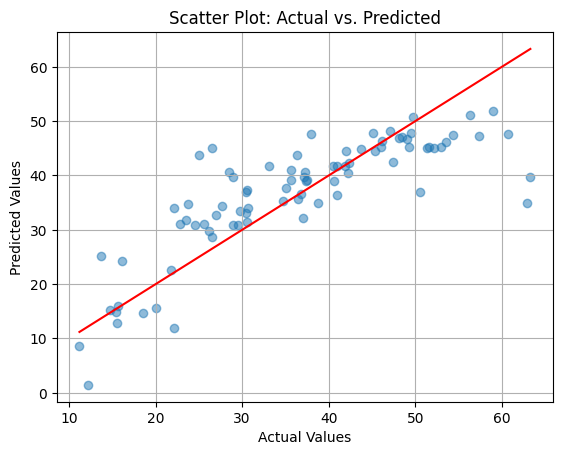

In [47]:
# Plotting the scatter plot
plt.scatter(y_test, y_pred_test, alpha=0.5)

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Actual vs. Predicted')

# Adding a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


In [55]:
rsquared=r2_score(y_train,y_pred_train)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.55


In [56]:
rsquared=r2_score(y_test,y_pred_test)
print(f'Testing data r-squared: {rsquared:.2}')

Testing data r-squared: 0.66


In [52]:
mean_absolute_error(y_test,y_pred_test)

5.403320473884869

In [58]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

Ridge reguralization

In [59]:
model=Ridge(fit_intercept=True,alpha=0.01)

In [60]:
model.fit(x_train,y_train)

Ridge(alpha=0.01)

In [61]:
train_preds=model.predict(x_train)

In [62]:
test_preds=model.predict(x_test)

In [63]:
print(r2_score(y_train, train_preds))

0.5466413861508439


# Decision tree regression

In [64]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [65]:
y_pred_test= tree_reg.predict(x_test)

In [66]:
y_pred_train= regressor.predict(x_test)

In [67]:
df_pred=pd.DataFrame({'actual':y_test.squeeze(),'predicted':y_pred_test.squeeze()})

In [68]:
df_pred

,actual,predicted
358,45.1,48.6
350,42.3,40.1
373,52.2,43.5
399,37.3,29.3
369,22.8,30.8
...,...,...
31,25.0,55.3
283,23.5,31.1
157,35.6,37.4
203,46.1,55.0


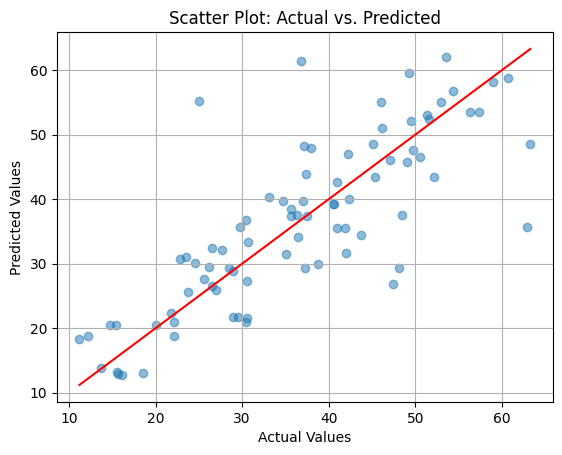

In [69]:
# Plotting the scatter plot
plt.scatter(y_test, y_pred_test, alpha=0.5)

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Actual vs. Predicted')

# Adding a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
r2_score(y_test,y_pred_test)

0.6305473802092466

In [ ]:
mean_absolute_error(y_test,y_pred_test)

5.448192771084337

# Random Tree Regressor

In [70]:
reg= RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

In [71]:
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


In [72]:
df_pred=pd.DataFrame({'actual':y_test.squeeze(),'predicted':y_pred_test.squeeze()})

In [73]:
df_pred

,actual,predicted
358,45.1,49.765
350,42.3,39.212
373,52.2,52.147
399,37.3,32.292
369,22.8,27.128
...,...,...
31,25.0,43.586
283,23.5,34.130
157,35.6,37.931
203,46.1,53.360


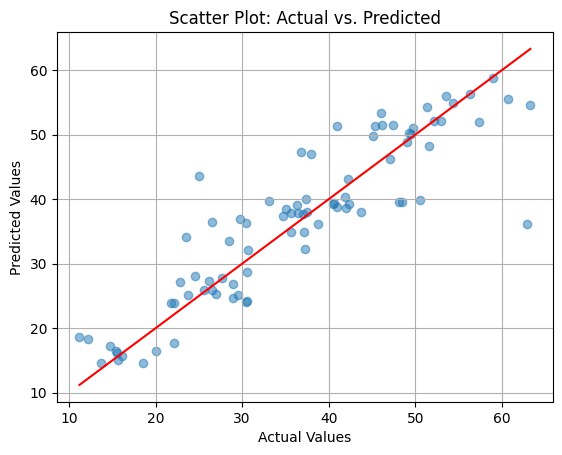

In [74]:
# Plotting the scatter plot
plt.scatter(y_test, y_pred_test, alpha=0.5)

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Actual vs. Predicted')

# Adding a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

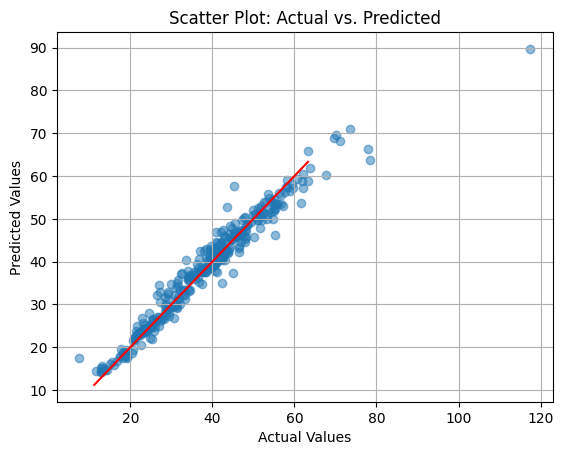

In [75]:
# Plotting the scatter plot
plt.scatter(y_train,y_pred_train, alpha=0.5)

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Actual vs. Predicted')

# Adding a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()

In [76]:
r2_score(y_test,y_pred_test)

0.8006639997842688

In [77]:
r2_score(y_train,y_pred_train)

0.9486019245821248

Lasso Regression



In [ ]:
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso=Lasso(random_state=42)
reg_1 = GridSearchCV(lasso, parameters, cv=3)
reg_1.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(random_state=42),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]})

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
y_pred_train = reg_1.predict(x_train)
r2_score(y_train, y_pred_train)

0.5863807621463497

In [ ]:
y_pred_test = reg_1.predict(x_test)
r2_score(y_test, y_pred_test)

0.6522364560297953

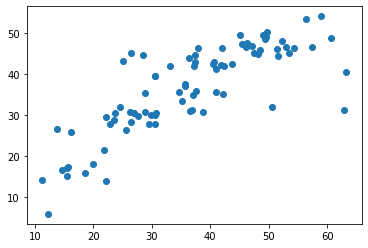

In [ ]:
plt.scatter(y_test,y_pred_test)

# Gradient Boosting Regressor

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [79]:
GBR.fit(x_train, y_train)


GradientBoostingRegressor(max_depth=4)

In [80]:
GBR.score(x_test, y_test)

0.7600387171170684

Importance of variables

In [81]:
#Deciding the importance of features of the dataframe
importance=reg.feature_importances_
importance

array([0.17462549, 0.56274983, 0.02158558, 0.11829054, 0.07250057,
       0.00959904, 0.04064895])

In [82]:
feature_names= list(x.columns)


In [83]:
#creating a dataframe for the features and its importance
tree_imp=pd.DataFrame(columns=['variable','importance'])
tree_imp.variable= feature_names
tree_imp.importance= importance
tree_imp

,variable,importance
0,House Age,0.174625
1,Distance from nearest Metro station (km),0.562750
2,Number of convenience stores,0.021586
3,latitude,0.118291
4,longitude,0.072501
5,Number of bedrooms,0.009599
6,House size (sqft),0.040649


In [84]:
#plotting the importance of the variables color bar graph
fig = px.bar(tree_imp, y = 'variable', 
       x = 'importance',
       labels = {'variable':'Varible Name','importance':'Affect on performance'},
       color = 'importance', 
       title = 'Variable vs Importance', 
       text = 'importance' ,
       color_continuous_scale=px.colors.qualitative.Plotly)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

# conclusion



*   Random forest model is the ideal model for prediction with R2 score of train set- 94% and test set- 78%

*   Distance from nearest metro has highest importance which affect more for the performance followed by house age

